In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv(r'F:\DS\Time_Series_Analysis\[ FreeCourseWeb.com ] Udemy - Python for Time Series Data Analysis\01. Introduction\UDEMY_TSA_FINAL\Data\co2_mm_mlo.csv')

### Inspect_the_Data_And_Creat_DatetimeIndex

In [2]:
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [3]:
# Add a "date" datetime column
df['date']=pd.to_datetime(dict(year=df['year'], month=df['month'], day=1))

In [4]:
# Set "date" to be the index
df.set_index('date',inplace=True)
df.index.freq = 'MS'
df.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


### Plot The Source Data

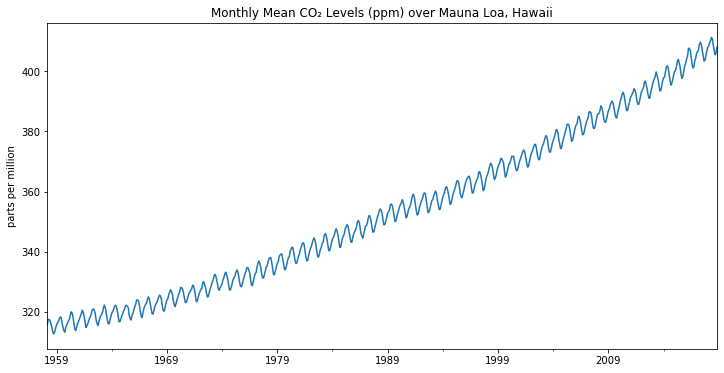

In [5]:
title = 'Monthly Mean CO₂ Levels (ppm) over Mauna Loa, Hawaii'
ylabel='parts per million'
xlabel='' # we don't really need a label here

ax = df['interpolated'].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

### ETS(Error_trend_seasonality)_Decompositiion

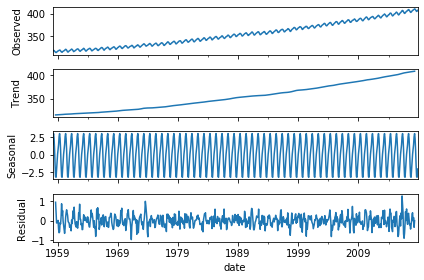

In [6]:
result = seasonal_decompose(df['interpolated'], model='add')
result.plot();

### Run_pmdarima.autoarima

In [7]:
# For SARIMA Orders we set seasonal=True and pass in an m value
auto_arima(df['interpolated'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -215.188
Date:                            Sun, 02 Feb 2020   AIC                            448.376
Time:                                    08:02:27   BIC                            489.689
Sample:                                         0   HQIC                           464.317
                                            - 729                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0001      0.000      0.754      0.451      -0.000       0.001
ar.L1          0.6106      0.191      3.205      0.001       0.237       0.984
ma.L1         -0.9139      0.198     -4.610      0.000      -1.302      -0.525
ma.L2          0.1076      0.091      1.186      0.236      -0.070       0.285
ar.S.L12       0.0567      0.051      1.106      0.269      -0.044       0.157
ar.S.L24       0.9406      0.051     18.355      0.000       0.840       1.041
ma.S.L12       0.0713      0.057      1.247      0.213      -0.041       0.183
ma.S.L24      -0.8226      0.052    -15.724      0.000      -0.925      -0.720
sigma2         0.0997      0.005     19.556      0.000       0.090       0.110
===================================================================================
Ljung-Box (Q):                       61.30   Jarque-Bera (JB):                 5.46
Prob(Q):                              0.02   Prob(JB):                         0.07
Heteroskedasticity (H):               1.03   Skew:                            -0.03
Prob(H) (two-sided):                  0.83   Kurtosis:                         3.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Split_the_Data

In [8]:
len(df)

729

In [9]:
# Set one year for testing
train = df.iloc[:717]
test = df.iloc[717:]

### Fit_SARIMA_MODEL_on_Auto_ARIMA_Parameters

In [10]:
model = SARIMAX(train['interpolated'],order=(0,1,3),seasonal_order=(1,0,1,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(0, 1, 3)x(1, 0, 1, 12)   Log Likelihood                -201.191
Date:                            Sun, 02 Feb 2020   AIC                            414.382
Time:                                    08:03:04   BIC                            441.824
Sample:                                03-01-1958   HQIC                           424.979
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3558      0.036     -9.812      0.000      -0.427      -0.285
ma.L2         -0.0246      0.037     -0.672      0.501      -0.096       0.047
ma.L3         -0.0851      0.036     -2.395      0.017      -0.155      -0.015
ar.S.L12       0.9996      0.000   3135.338      0.000       0.999       1.000
ma.S.L12      -0.8666      0.023    -38.514      0.000      -0.911      -0.823
sigma2         0.0950      0.005     20.302      0.000       0.086       0.104
===================================================================================
Ljung-Box (Q):                       44.02   Jarque-Bera (JB):                 4.38
Prob(Q):                              0.31   Prob(JB):                         0.11
Heteroskedasticity (H):               1.15   Skew:                             0.02
Prob(H) (two-sided):                  0.28   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(0,1,3)(1,0,1,12) Predictions')

In [12]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test['interpolated'][i]}")

predicted=406.6096351, expected=406.81
predicted=407.8244407, expected=407.96
predicted=408.5782329, expected=408.32
predicted=409.4832099, expected=409.41
predicted=411.0390018, expected=410.24
predicted=411.6419625, expected=411.24
predicted=410.8625737, expected=410.79
predicted=409.1729576, expected=408.71
predicted=407.0726755, expected=406.99
predicted=405.6223132, expected=405.51
predicted=405.8922354, expected=406.0
predicted=407.4254243, expected=408.02


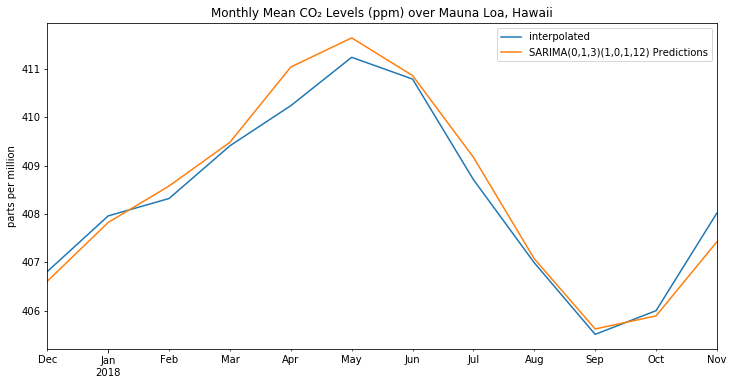

In [13]:
# Plot predictions against known values
title = 'Monthly Mean CO₂ Levels (ppm) over Mauna Loa, Hawaii'
ylabel='parts per million'
xlabel=''

ax = test['interpolated'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

## Evaluate_The_Model

In [14]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['interpolated'], predictions)
print(f'SARIMA(0,1,3)(1,0,1,12) MSE Error: {error:11.10}')

SARIMA(0,1,3)(1,0,1,12) MSE Error: 0.1278936403


In [15]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['interpolated'], predictions)
print(f'SARIMA(0,1,3)(1,0,1,12) RMSE Error: {error:11.10}')

SARIMA(0,1,3)(1,0,1,12) RMSE Error: 0.3576222033


### Retrain_the_model_on_full_data, and_forecast_the_future

In [16]:
model = SARIMAX(df['interpolated'],order=(0,1,3),seasonal_order=(1,0,1,12))
results = model.fit()
fcast = results.predict(len(df),len(df)+11,typ='levels').rename('SARIMA(0,1,3)(1,0,1,12) Forecast')

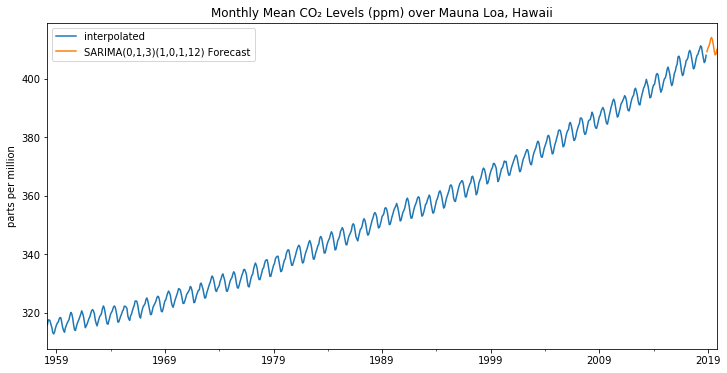

In [17]:
# Plot predictions against known values
title = 'Monthly Mean CO₂ Levels (ppm) over Mauna Loa, Hawaii'
ylabel='parts per million'
xlabel=''

ax = df['interpolated'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);